In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('SBH __ MSC _ Lending Project_masked.csv')
print(df.describe())
print(df.info())

       Years of exp     t6_order     t7_order     t8_order     t9_order  \
count    104.000000   105.000000   105.000000   105.000000   105.000000   
mean       6.384615   320.123810   324.752381   330.476190   320.019048   
std        4.668231   903.253422   765.020246   664.032843   682.153110   
min        1.000000     0.000000     0.000000     0.000000     0.000000   
25%        3.000000     4.000000     3.000000    23.000000    23.000000   
50%        5.000000    72.000000    91.000000   123.000000   111.000000   
75%        8.000000   293.000000   330.000000   336.000000   309.000000   
max       27.000000  8453.000000  6638.000000  5325.000000  5563.000000   

         t10_order    t11_order        t6_gmv        t7_gmv        t8_gmv  \
count   105.000000   105.000000  7.900000e+01  8.100000e+01  8.300000e+01   
mean    327.219048   351.142857  8.390450e+08  9.197898e+08  9.461528e+08   
std     602.112403   772.260225  1.535751e+09  1.698284e+09  1.763692e+09   
min       0.0000

In [3]:
df.duplicated().sum()

0

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Years of exp'),
  Text(1, 0, 't6_order'),
  Text(2, 0, 't7_order'),
  Text(3, 0, 't8_order'),
  Text(4, 0, 't9_order'),
  Text(5, 0, 't10_order'),
  Text(6, 0, 't11_order'),
  Text(7, 0, 't6_gmv'),
  Text(8, 0, 't7_gmv'),
  Text(9, 0, 't8_gmv'),
  Text(10, 0, 't9_gmv'),
  Text(11, 0, 't10_gmv'),
  Text(12, 0, 't11_gmv'),
  Text(13, 0, 'avg_gmv_l6m'),
  Text(14, 0, 'pro_info.product_count'),
  Text(15, 0, 'min_price'),
  Text(16, 0, 'max_price')])

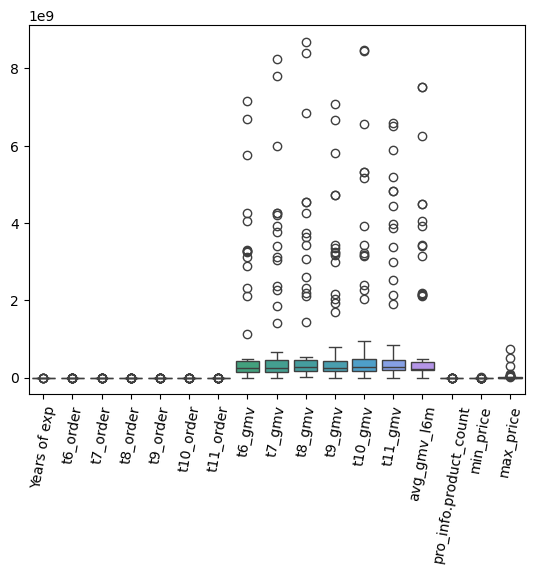

In [4]:
#outliers detection
sns.boxplot(df)
plt.xticks(rotation=80)

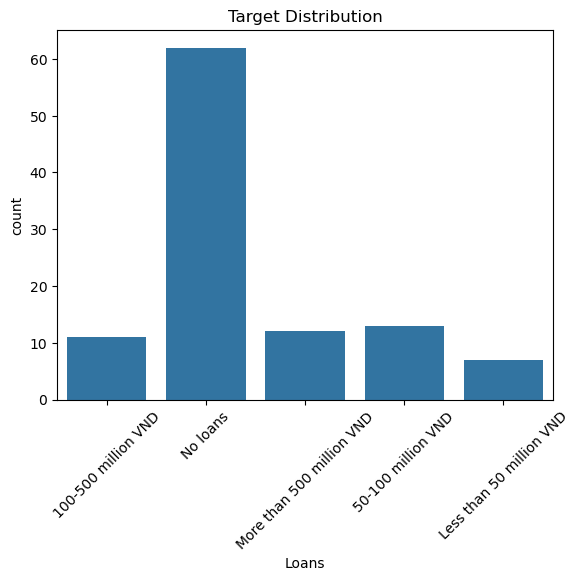

In [5]:
sns.countplot(x=df["Loans"])
plt.title("Target Distribution")
plt.xticks(rotation=45)
plt.show()

In [6]:
# Creating new features based on domain knowledge
df["total_orders"] = df[["t6_order", "t7_order", "t8_order", "t9_order", "t10_order", "t11_order"]].sum(axis=1)
df["total_gmv"] = df[["t6_gmv", "t7_gmv", "t8_gmv", "t9_gmv", "t10_gmv", "t11_gmv"]].sum(axis=1)
df["gmv_per_order"] = df["total_gmv"] / (df["total_orders"] + 1)  
df["price_range"] = df["max_price"] - df["min_price"]



C:\Users\manis\AppData\Local\Temp\ipykernel_19184\785113490.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], palette="viridis")
C:\Users\manis\AppData\Local\Temp\ipykernel_19184\785113490.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], palette="viridis")
C:\Users\manis\AppData\Local\Temp\ipykernel_19184\785113490.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], palette="viridis")
C:\Users\manis\AppData\Local\Temp\ipykernel_19184\785113490.py:16: FutureWar

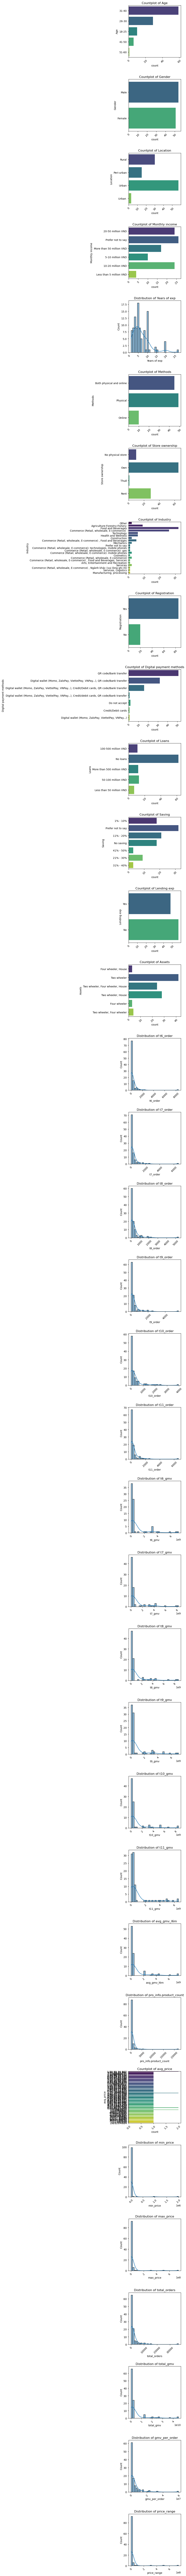

In [7]:

columns = df.columns  
num_cols = len(columns)


fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, num_cols * 4))


for i, col in enumerate(columns):
    # Plot only if it's a numerical column
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(df[col], ax=axes[i], bins=30, kde=True)
        axes[i].set_title(f"Distribution of {col}")
    else:
        # Handle categorical columns with countplot
        sns.countplot(y=df[col], ax=axes[i], palette="viridis")
        axes[i].set_title(f"Countplot of {col}")
    
    
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', rotation=0)


plt.tight_layout(h_pad=2)  
plt.show()

In [8]:
skewed_cols = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_cols = skewed_cols[skewed_cols > 0.5].index.tolist()
print("Skewed Columns:", skewed_cols)


Skewed Columns: ['pro_info.product_count', 'min_price', 't6_order', 'price_range', 'max_price', 't7_order', 't11_order', 'total_orders', 't9_order', 't8_order', 'gmv_per_order', 't10_order', 'total_gmv', 't8_gmv', 't10_gmv', 'avg_gmv_l6m', 't7_gmv', 't6_gmv', 't9_gmv', 't11_gmv', 'Years of exp']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      105 non-null    object 
 1   Gender                   105 non-null    object 
 2   Location                 105 non-null    object 
 3   Monthly income           105 non-null    object 
 4   Years of exp             104 non-null    float64
 5   Methods                  104 non-null    object 
 6   Store ownership          105 non-null    object 
 7   Industry                 105 non-null    object 
 8   Registration             105 non-null    object 
 9  

In [9]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

for col in skewed_cols:
    if (df[col] > 0).all():  
        df[col] = np.log1p(df[col])  
    else:
        df[col] = np.sqrt(df[col] - df[col].min() + 1)

# Box-Cox transformation
power_transformer = PowerTransformer(method='yeo-johnson') 
df[skewed_cols] = power_transformer.fit_transform(df[skewed_cols])

In [10]:
columns_to_fill=['Years of exp','Methods','Digital payment methods','Saving','Assets','avg_price','min_price','max_price']

for col in columns_to_fill:
    if df[col].dtype == 'object':  # Categorical columns
        mode_value = df[col].mode().dropna().values
        if len(mode_value) > 0:
            df[col] = df[col].fillna(mode_value[0])
        else:
            df[col] = df[col].fillna("Unknown")
    else:  # Numeric columns
        df[col] = df[col].fillna(df[col].median())

In [11]:
from sklearn.impute import SimpleImputer, KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df[df.select_dtypes(include=["float64", "int64"]).columns] = knn_imputer.fit_transform(df.select_dtypes(include=["float64", "int64"]))

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Loans'] = le.fit_transform(df['Loans'].astype(str))

In [13]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Copy original data
data = df.copy()



ordinal_cols = ['Age', 'Monthly income']  # Ordered categories
onehot_cols = ['Gender', 'Digital payment methods', 'Registration']  # Nominal
label_cols = ['Store ownership', 'Saving', 'Lending exp', 'Assets']  # Binary
target_cols = ['Industry', 'Location', 'Methods']  # High-cardinality categorical
numeric_cols = ['t6_order', 't7_order', 't8_order', 't9_order', 't10_order', 't11_order', 
                't6_gmv', 't7_gmv', 't8_gmv', 't9_gmv', 't10_gmv', 't11_gmv', 
                'avg_gmv_l6m', 'pro_info.product_count', 'avg_price', 'min_price', 'max_price','total_orders',
                'total_gmv','gmv_per_order','price_range']

# Convert 'avg_price' to numeric and fill NaN with the mean value
data['avg_price'] = data['avg_price'].astype(str).str.replace(',', '', regex=True)
data['avg_price'] = pd.to_numeric(data['avg_price'], errors='coerce')

data['avg_price'] = data['avg_price'].fillna(data['avg_price'].mean())  


for col in onehot_cols + target_cols:
    data[col] = data[col].astype(str).str.lower().str.strip()

#Manual Target Encoding for High-Cardinality Categorical Columns**
for col in target_cols:
    mean_encoded = df.groupby(col)['Loans'].mean().to_dict()
    data[col + '_encoded'] = data[col].map(mean_encoded)

# Drop original target columns after encoding
data.drop(columns=target_cols, inplace=True)

#Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('ordinal', OrdinalEncoder(), ordinal_cols),  # Ordinal Encoding
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), onehot_cols),  # One-Hot Encoding
    ('label', OrdinalEncoder(), label_cols),  # Pass binary features as is
])

df_processed = preprocessor.fit_transform(data)
# Convert to DataFrame
df_processed = pd.DataFrame(df_processed, columns=preprocessor.get_feature_names_out())

#Final Output
print(df_processed.head())


   ordinal__Age  ordinal__Monthly income  onehot__Gender_male  \
0           2.0                      1.0                  1.0   
1           2.0                      5.0                  1.0   
2           1.0                      5.0                  0.0   
3           2.0                      5.0                  1.0   
4           2.0                      1.0                  1.0   

   onehot__Digital payment methods_digital wallet (momo, zalopay, viettelpay, vnpay...)  \
0                                                0.0                                      
1                                                0.0                                      
2                                                0.0                                      
3                                                0.0                                      
4                                                0.0                                      

   onehot__Digital payment methods_digital wallet (momo, zalop

In [14]:
# Converting numerical columns and target variable to DataFrame
df_numeric = df[numeric_cols + ['Loans']].reset_index(drop=True)

df_final = pd.concat([df_numeric, df_processed], axis=1)

df_final['avg_price'] = df_final['avg_price'].astype(str).str.replace(',', '', regex=True)
df_final['avg_price'] = pd.to_numeric(df_final['avg_price'], errors='coerce')

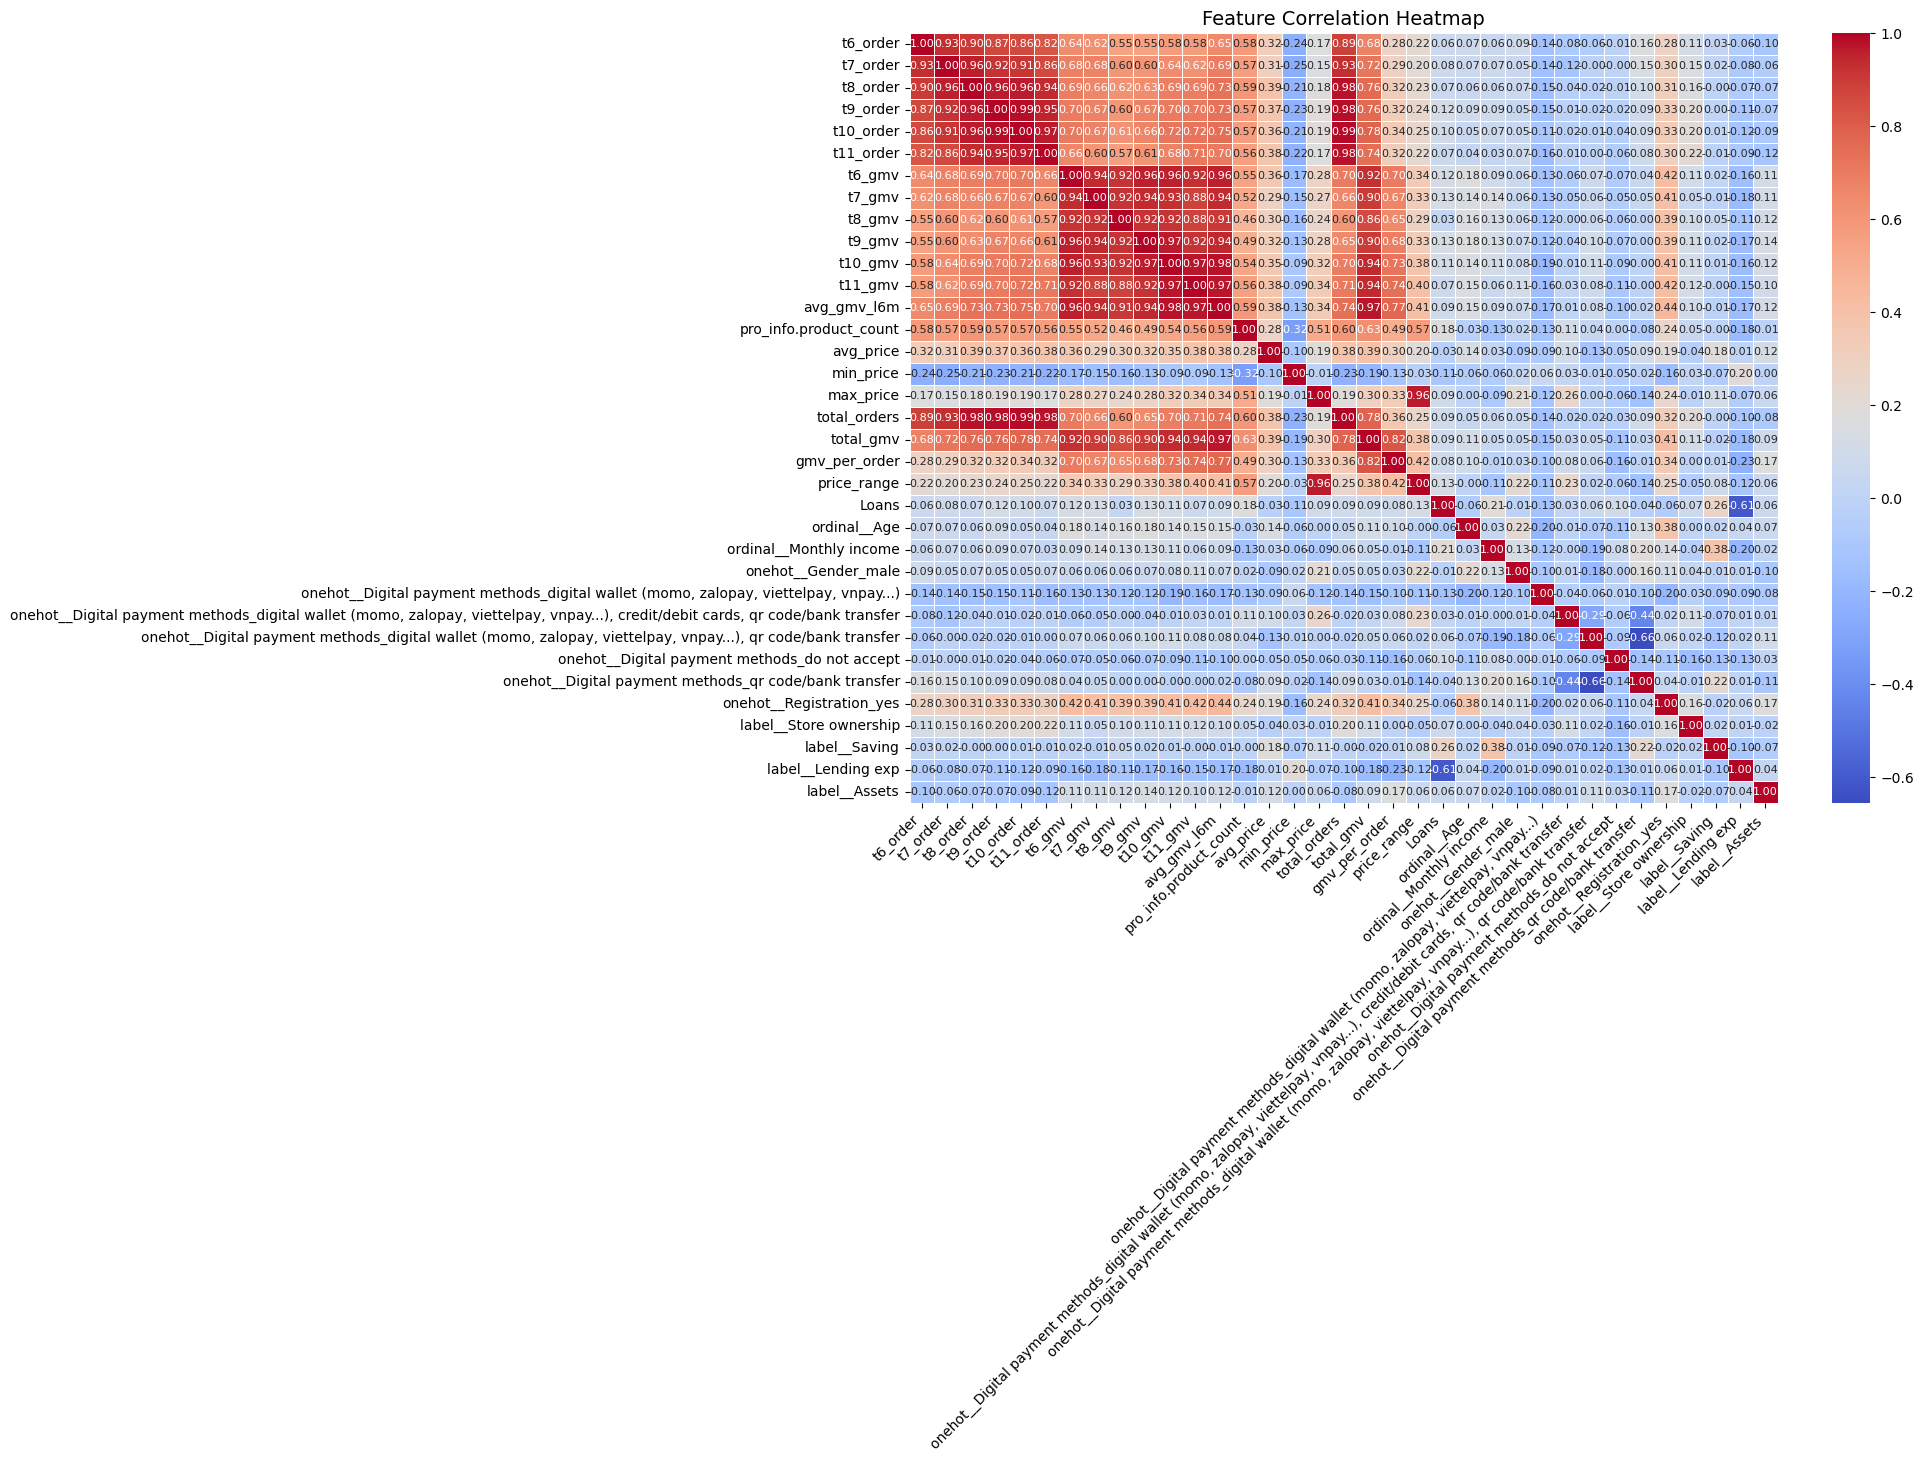

In [46]:
#correlation
corr_matrix = df_final.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(
    corr_matrix, 
    annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, 
    annot_kws={"size": 8}, 
    cbar=True
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title("Feature Correlation Heatmap", fontsize=14)


plt.show()

In [16]:
# Identify Highly Correlated Features
target_variable = 'Loans'
correlation_threshold = 0.75

# Find highly correlated features with the target
highly_correlated_features = corr_matrix.index[abs(corr_matrix[target_variable]) > correlation_threshold].tolist()

# Remove the target variable itself
if target_variable in highly_correlated_features:
    highly_correlated_features.remove(target_variable)

print(f"Highly correlated features with {target_variable}: {highly_correlated_features}")

#Drop the Highly Correlated Features
data_cleaned = df_final.drop(columns=highly_correlated_features)

# Display the Remaining Features
print("Remaining Features after removing highly correlated ones:")
print(data_cleaned.columns)

Highly correlated features with Loans: []
Remaining Features after removing highly correlated ones:
Index(['t6_order', 't7_order', 't8_order', 't9_order', 't10_order',
       't11_order', 't6_gmv', 't7_gmv', 't8_gmv', 't9_gmv', 't10_gmv',
       't11_gmv', 'avg_gmv_l6m', 'pro_info.product_count', 'avg_price',
       'min_price', 'max_price', 'total_orders', 'total_gmv', 'gmv_per_order',
       'price_range', 'Loans', 'ordinal__Age', 'ordinal__Monthly income',
       'onehot__Gender_male',
       'onehot__Digital payment methods_digital wallet (momo, zalopay, viettelpay, vnpay...)',
       'onehot__Digital payment methods_digital wallet (momo, zalopay, viettelpay, vnpay...), credit/debit cards, qr code/bank transfer',
       'onehot__Digital payment methods_digital wallet (momo, zalopay, viettelpay, vnpay...), qr code/bank transfer',
       'onehot__Digital payment methods_do not accept',
       'onehot__Digital payment methods_qr code/bank transfer',
       'onehot__Registration_yes', 

In [17]:
X = data_cleaned.drop(columns=['Loans']) 
y = data_cleaned['Loans'] 

In [18]:
data_cleaned.info()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 35 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   t6_order                                                                                                                         105 non-null    float64
 1   t7_order                                                                                                                         105 non-null    float64
 2   t8_order                                                                                                                         105 non-null    float64
 3   t9_order                                                                                            

In [19]:
# Split dataset (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Scaling the Data (After Splitting to Avoid Data Leakage)
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])  
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])  

In [20]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


models = {
    'LogisticRegression': LogisticRegression(C=0.1, max_iter=500),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5, min_samples_split=10),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    'AdaBoostClassifier': AdaBoostClassifier(n_estimators=50, learning_rate=0.5)
}

results = {}

# Loop through models, fit, predict, and evaluate
for model_name, model in models.items():
    print(f"\n🔹 Training {model_name}...")
    
   # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Accuracy and Reports
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"\n{model_name} Results:")
    print(f" Train Accuracy: {train_acc:.4f}")
    print(f" Test Accuracy: {test_acc:.4f}")
    print("\n Test Classification Report:\n", classification_report(y_test, y_test_pred))
    print('-' * 50)


🔹 Training LogisticRegression...

LogisticRegression Results:
 Train Accuracy: 0.6548
 Test Accuracy: 0.7619

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      1.00      0.40         1
           3       0.00      0.00      0.00         1
           4       0.88      0.94      0.91        16

    accuracy                           0.76        21
   macro avg       0.28      0.48      0.33        21
weighted avg       0.68      0.76      0.71        21

--------------------------------------------------

🔹 Training DecisionTreeClassifier...

DecisionTreeClassifier Results:
 Train Accuracy: 0.8452
 Test Accuracy: 0.5714

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
       

C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\sit


RandomForestClassifier Results:
 Train Accuracy: 0.8690
 Test Accuracy: 0.6667

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.82      0.88      0.85        16

    accuracy                           0.67        21
   macro avg       0.16      0.17      0.17        21
weighted avg       0.63      0.67      0.65        21

--------------------------------------------------

🔹 Training GradientBoostingClassifier...


C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packag


GradientBoostingClassifier Results:
 Train Accuracy: 1.0000
 Test Accuracy: 0.7143

 Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.93      0.81      0.87        16

    accuracy                           0.71        21
   macro avg       0.49      0.43      0.41        21
weighted avg       0.87      0.71      0.76        21

--------------------------------------------------

🔹 Training AdaBoostClassifier...


C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



AdaBoostClassifier Results:
 Train Accuracy: 0.7738
 Test Accuracy: 0.6667

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.93      0.88      0.90        16

    accuracy                           0.67        21
   macro avg       0.19      0.17      0.18        21
weighted avg       0.71      0.67      0.69        21

--------------------------------------------------


C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packag

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#hyperparameter grid.
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10)
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'max_depth': 17, 'min_samples_split': 6, 'n_estimators': 152}
Test Accuracy: 0.7619047619047619
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.88      0.88      0.88        16

    accuracy                           0.76        21
   macro avg       0.47      0.44      0.41        21
weighted avg       0.83      0.76      0.77        21



C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Data Science\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
from sklearn.model_selection import GridSearchCV


adaboost = AdaBoostClassifier(random_state=42)

#parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1, 10]  # Shrinks contribution of each classifier
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

# Train AdaBoost with the best parameters
best_adaboost = AdaBoostClassifier(**grid_search.best_params_, random_state=42)
best_adaboost.fit(X_train, y_train)

# Evaluate the model
train_accuracy = best_adaboost.score(X_train, y_train)
test_accuracy = best_adaboost.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'learning_rate': 1, 'n_estimators': 50}
Train Accuracy: 0.7857142857142857
Test Accuracy: 0.6190476190476191
